In [1]:
EXPER_PATH = '/root/Internship-Valeo/Project/exports'

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import evaluations.descriptor_evaluation as ev
from plot_utils import plot_imgs
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
def draw_matches(data):
    keypoints1 = [cv2.KeyPoint(p[1], p[0], 1) for p in data['keypoints1'].astype(np.float32)]
    keypoints2 = [cv2.KeyPoint(p[1], p[0], 1) for p in data['keypoints2'].astype(np.float32)]
    inliers = data['inliers'].astype(bool)
    matches = np.array(data['matches'])[inliers].tolist()
    img1 = np.concatenate([output['image1'], output['image1'], output['image1']], axis=2) * 255
    img2 = np.concatenate([output['image2'], output['image2'], output['image2']], axis=2) * 255
    return cv2.drawMatches(np.uint8(img1), keypoints1, np.uint8(img2), keypoints2, matches,
                           None, matchColor=(0,255,0), singlePointColor=(0, 0, 255))

# Changes in viewpoint

In [4]:
# experiments = ['sp_v6_desc_hp_v', 'magic_leap_pretrained_model_desc_hp_v', 'sift_desc_hp_v', 'orb_desc_hp_v']
experiments = ['superpoint_hpatches-v']

### Images visualization

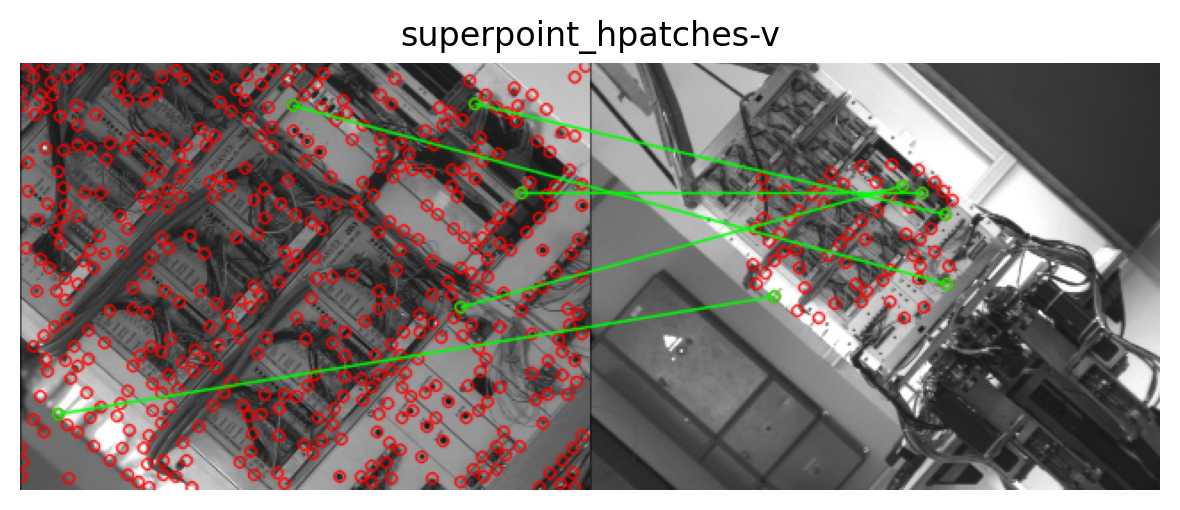

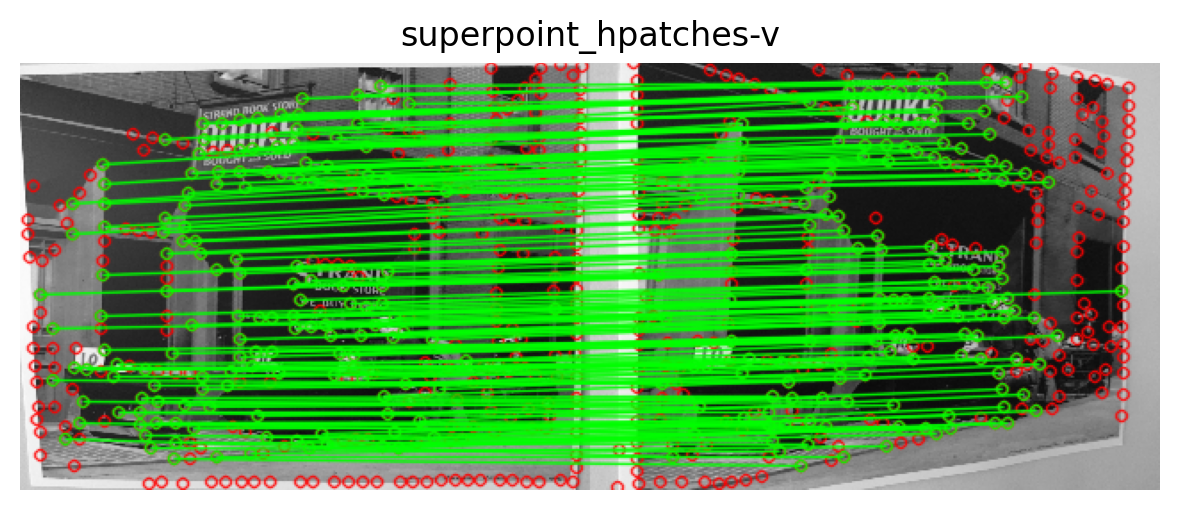

In [5]:
num_images = 2
for e in experiments:
    orb = True if e[:3] == 'orb' else False
    outputs = ev.get_homography_matches(e, keep_k_points=1000, correctness_thresh=3, num_images=num_images, orb=orb)
    for output in outputs:
        img = draw_matches(output)/255.
        plot_imgs([img], titles=[e], dpi=200)

### Homography estimation correctness

In [8]:
for exp in experiments:
    orb = True if exp[:3] == 'orb' else False
    correctness = ev.homography_estimation(exp, keep_k_points=1000, correctness_thresh=3, orb=orb)
    print('> {}: {}'.format(exp, correctness))

> superpoint_hpatches-v: 0.21016949152542372


### Check that the image is warped correctly

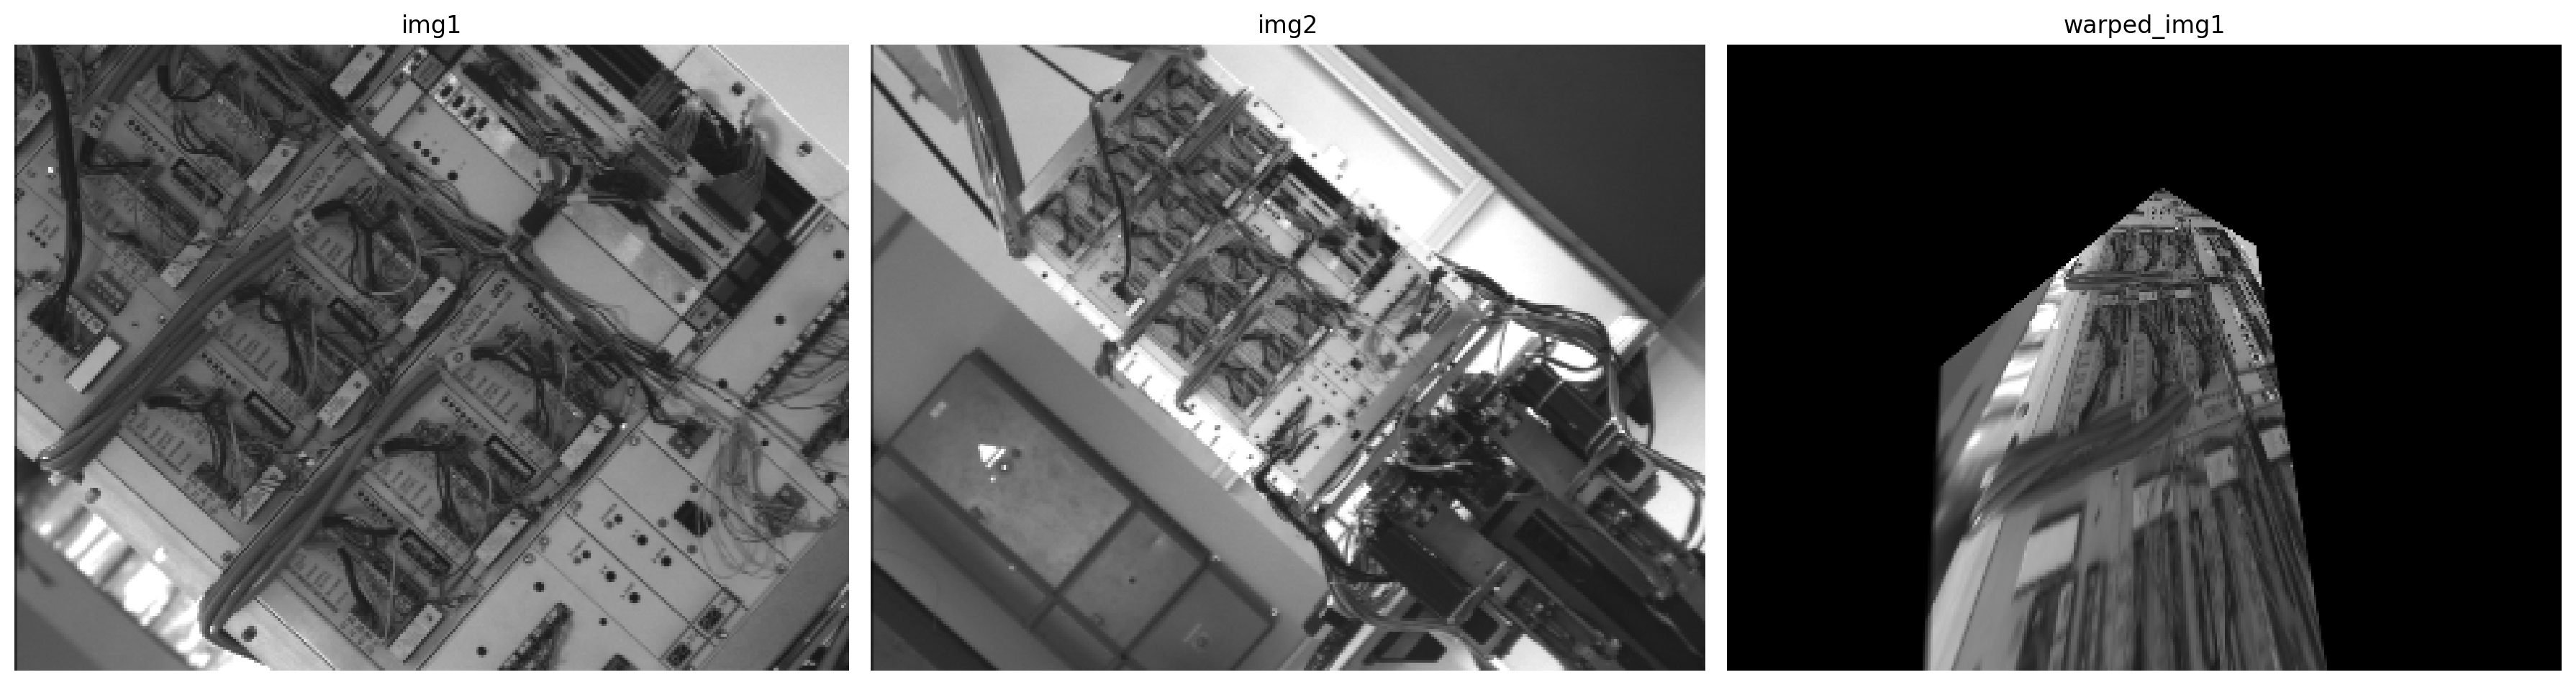

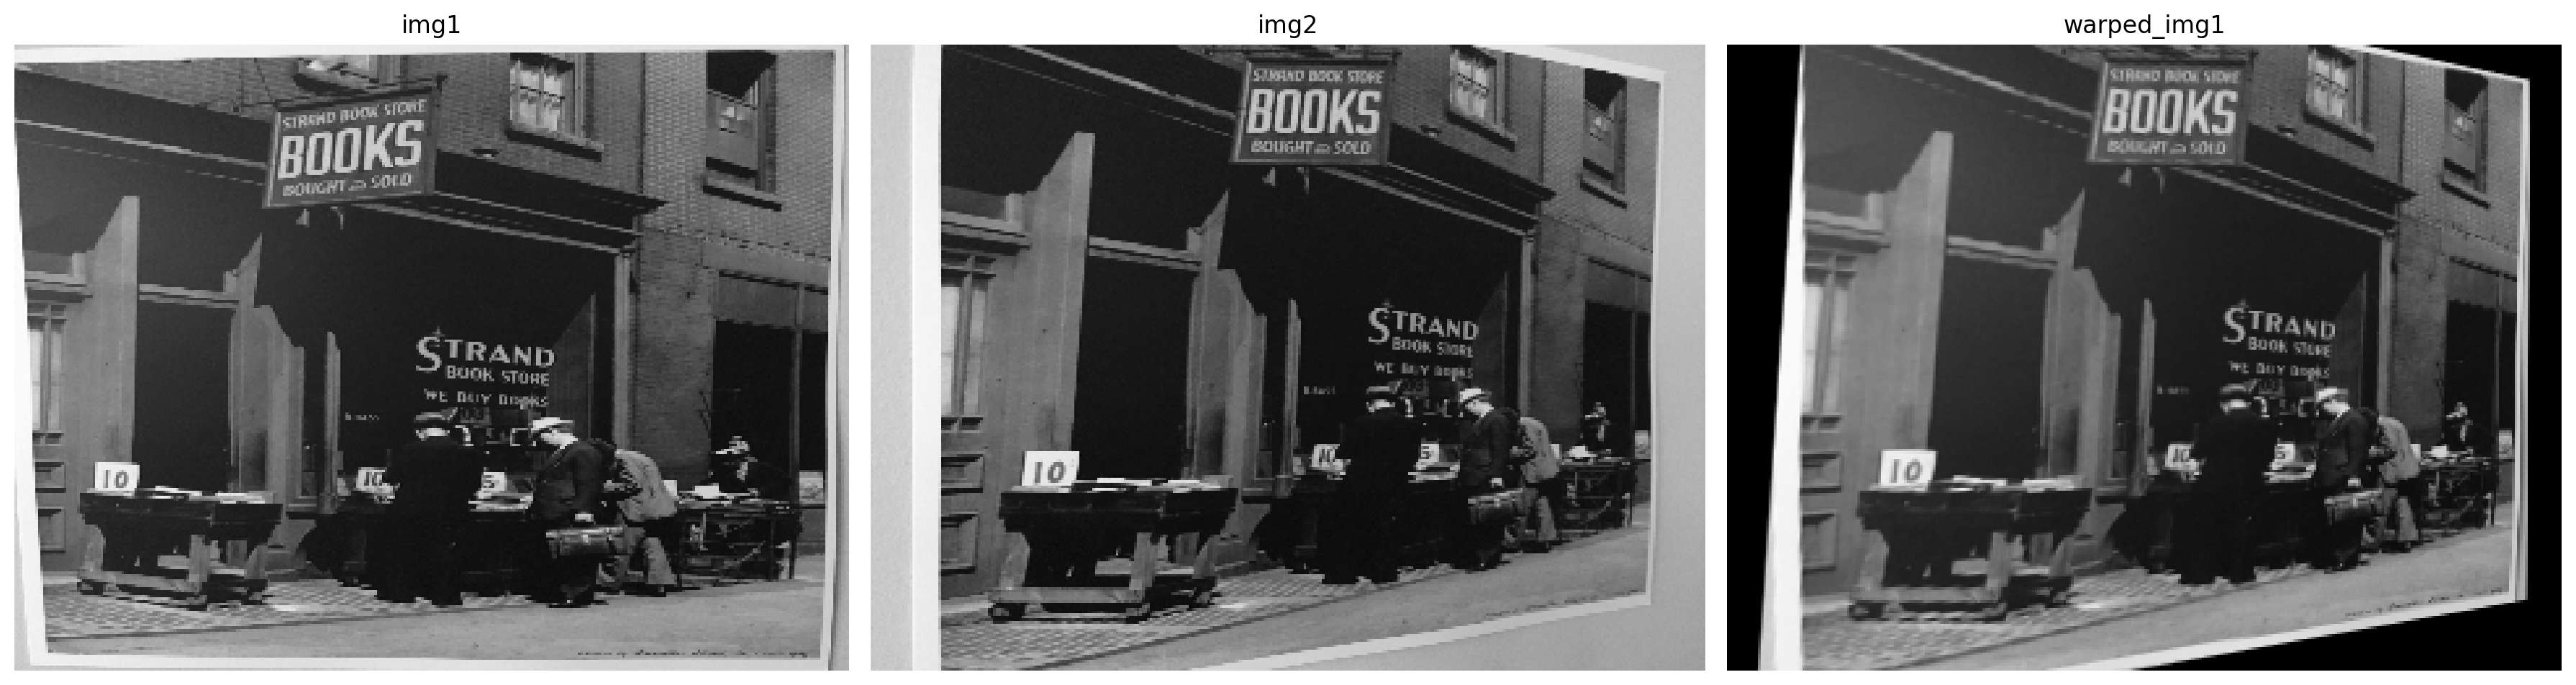

In [9]:
num_images = 2
for e in experiments:
    orb = True if e[:3] == 'orb' else False
    outputs = ev.get_homography_matches(e, keep_k_points=1000, correctness_thresh=3, num_images=num_images, orb=orb)
    for output in outputs:
        img1 = output['image1'] * 255
        img2 = output['image2'] * 255
        H = output['homography']
        warped_img1 = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))
        img1 = np.concatenate([img1, img1, img1], axis=2)
        warped_img1 = np.stack([warped_img1, warped_img1, warped_img1], axis=2)
        img2 = np.concatenate([img2, img2, img2], axis=2)
        plot_imgs([img1 / 255., img2 / 255., warped_img1 / 255.], titles=['img1', 'img2', 'warped_img1'], dpi=200)

# Changes in illumination

In [10]:
# experiments = ['sp_v6_desc_hp_i', 'magic_leap_pretrained_model_desc_hp_i', 'sift_desc_hp_i', 'orb_desc_hp_i']
experiments = ['superpoint_hpatches-i']

### Images visualization

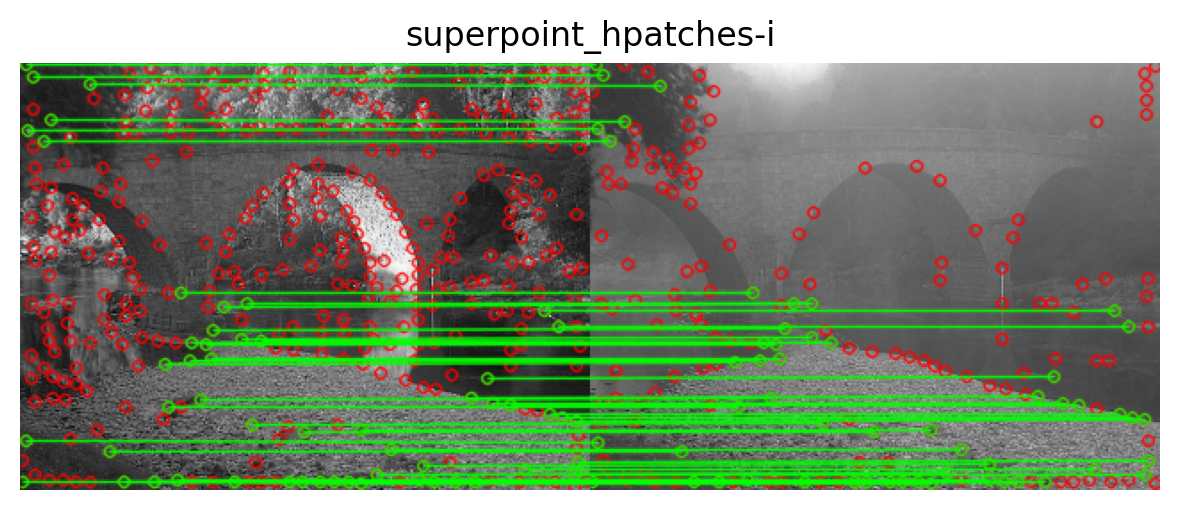

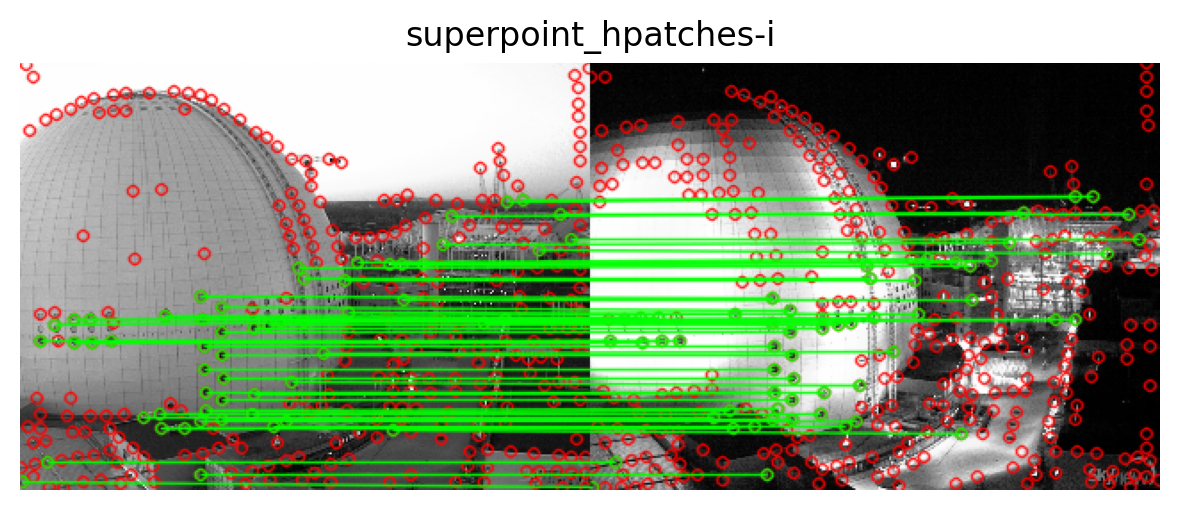

In [11]:
num_images = 2
for e in experiments:
    orb = True if e[:3] == 'orb' else False
    outputs = ev.get_homography_matches(e, keep_k_points=1000, correctness_thresh=3, num_images=num_images, orb=orb)
    for output in outputs:
        img = draw_matches(output) / 255.
        plot_imgs([img], titles=[e], dpi=200, cmap='gray')

### Homography estimation correctness

In [12]:
for exp in experiments:
    orb = True if exp[:3] == 'orb' else False
    correctness = ev.homography_estimation(exp, keep_k_points=1000, correctness_thresh=3, orb=orb)
    print('> {}: {}'.format(exp, correctness))

> superpoint_hpatches-i: 0.9228070175438596


# All changes

In [ ]:
# experiments = ['sp_v6_desc_hp_all', 'magic_leap_pretrained_model_desc_hp_all', 'sift_desc_hp_all', 'orb_desc_hp_all']
experiments = ['superpoint_hpatches-all']

In [ ]:
thresholds = [1, 3, 5]
for thresh in thresholds:
    print("Correctness threshold = " + str(thresh) + ":")
    for exp in experiments:
        orb = True if exp[:3] == 'orb' else False
        correctness = ev.homography_estimation(exp, keep_k_points=1000, correctness_thresh=thresh, orb=orb)
        print('> {}: {}'.format(exp, correctness))